In [1]:
'''1. Undertanding the variables in our dataset
2. Exploring the dependent variables: deep look at our target variable which is the vaariable that we are trying to predict
3. Investigating the relationships between the dependent variable and the other independent variables
4. data cleaning . in this step we handle missing data, outliers and categorical variables
5. checking statistical assumptions. if our data meet the assumptions that are required for advanced analysis for example checking the data normality'''

'1. Undertanding the variables in our dataset\n2. Exploring the dependent variables: deep look at our target variable which is the vaariable that we are trying to predict\n3. Investigating the relationships between the dependent variable and the other independent variables\n4. data cleaning . in this step we handle missing data, outliers and categorical variables\n5. checking statistical assumptions. if our data meet the assumptions that are required for advanced analysis for example checking the data normality'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
0,1,8450,7,2003,856,1710,2,3,Gd,8,548,208500
1,2,9600,6,1976,1262,1262,2,3,TA,6,460,181500
2,3,11250,7,2001,920,1786,2,3,Gd,6,608,223500
3,4,9550,7,1915,756,1717,1,3,Gd,7,642,140000
4,5,14260,8,2000,1145,2198,2,4,Gd,9,836,250000


In [5]:
print(df.shape)

(1460, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   YearBuilt     1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   BedroomAbvGr  1460 non-null   int64 
 8   KitchenQual   1460 non-null   object
 9   TotRmsAbvGrd  1460 non-null   int64 
 10  GarageArea    1460 non-null   int64 
 11  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 137.0+ KB


In [7]:
df.isnull().sum()

Id              0
LotArea         0
OverallQual     0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
GarageArea      0
SalePrice       0
dtype: int64

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df.corr()

C:\Users\ultra\AppData\Local\Temp\ipykernel_6636\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice
Id,1.000000,-0.033226,-0.028365,-0.012713,-0.015415,0.008273,0.005587,0.037719,0.027239,0.017634,-0.021917
LotArea,-0.033226,1.000000,0.105806,0.014228,0.260833,0.263116,0.126031,0.119690,0.190015,0.180403,0.263843
OverallQual,-0.028365,0.105806,1.000000,0.572323,0.537808,0.593007,0.550600,0.101676,0.427452,0.562022,0.790982
YearBuilt,-0.012713,0.014228,0.572323,1.000000,0.391452,0.199010,0.468271,-0.070651,0.095589,0.478954,0.522897
TotalBsmtSF,-0.015415,0.260833,0.537808,0.391452,1.000000,0.454868,0.323722,0.050450,0.285573,0.486665,0.613581
GrLivArea,0.008273,0.263116,0.593007,0.199010,0.454868,1.000000,0.630012,0.521270,0.825489,0.468997,0.708624
FullBath,0.005587,0.126031,0.550600,0.468271,0.323722,0.630012,1.000000,0.363252,0.554784,0.405656,0.560664
BedroomAbvGr,0.037719,0.119690,0.101676,-0.070651,0.050450,0.521270,0.363252,1.000000,0.676620,0.065253,0.168213
TotRmsAbvGrd,0.027239,0.190015,0.427452,0.095589,0.285573,0.825489,0.554784,0.676620,1.000000,0.337822,0.533723
GarageArea,0.017634,0.180403,0.562022,0.478954,0.486665,0.468997,0.405656,0.065253,0.337822,1.000000,0.623431


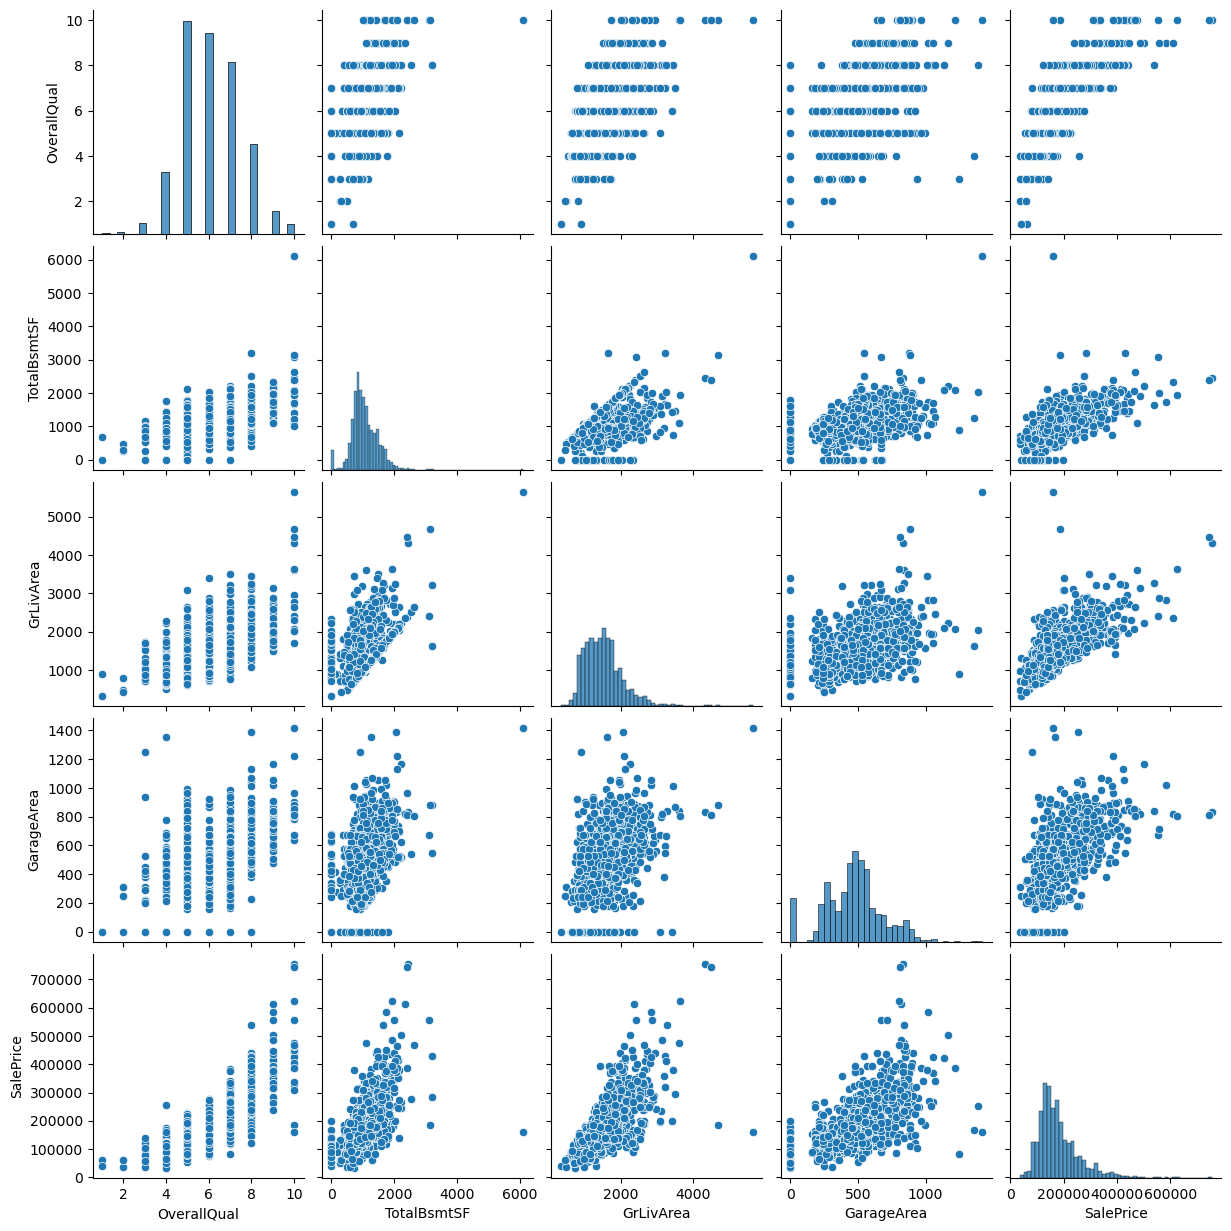

In [10]:
columns = ['OverallQual', 'TotalBsmtSF', 'GrLivArea','GarageArea', 'SalePrice']
sns.pairplot(df[columns])

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

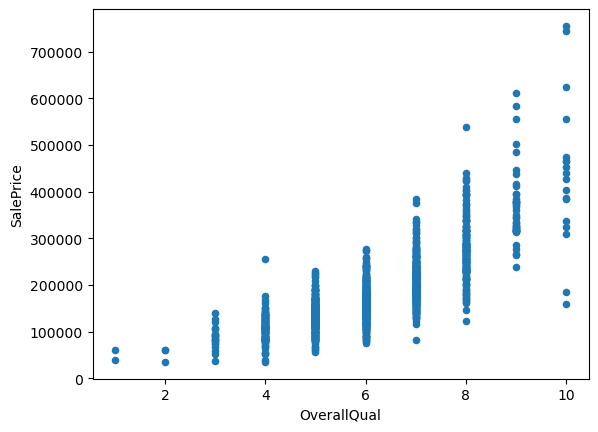

In [11]:
#Scatter plot
df.plot.scatter(x='OverallQual', y = 'SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

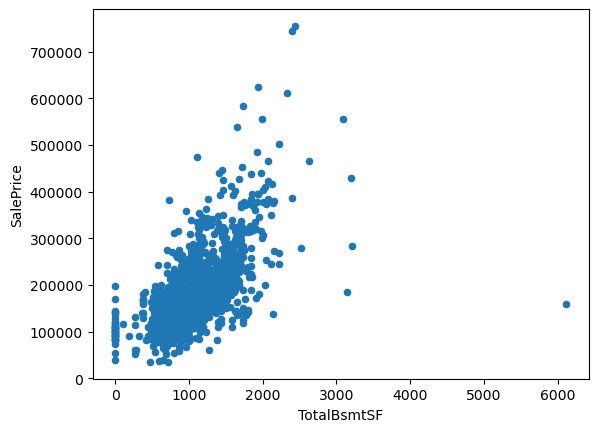

In [12]:
df.plot.scatter(x="TotalBsmtSF", y="SalePrice")

In [13]:
df.loc[(df['TotalBsmtSF']>3000) & (df['SalePrice']<300000)]

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
332,333,10655,8,2003,3206,1629,2,3,Gd,7,880,284000
523,524,40094,10,2007,3138,4676,3,3,Ex,11,884,184750
1298,1299,63887,10,2008,6110,5642,2,3,Ex,12,1418,160000


In [14]:
df = df.drop([332,523,1298])

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

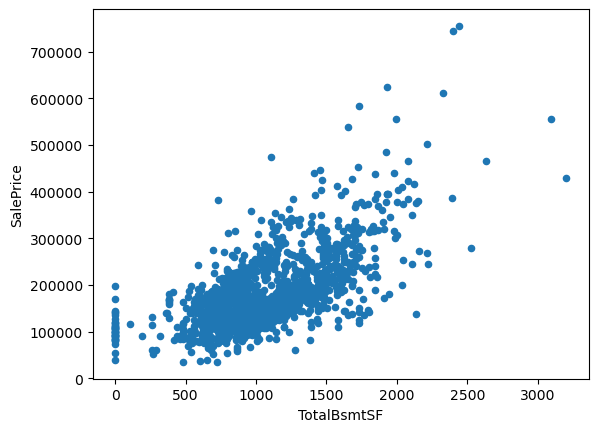

In [15]:
df.plot.scatter(x="TotalBsmtSF", y="SalePrice")

In [16]:
df['TotalBsmtSF'].corr(df['SalePrice'])

0.6529720902241524

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

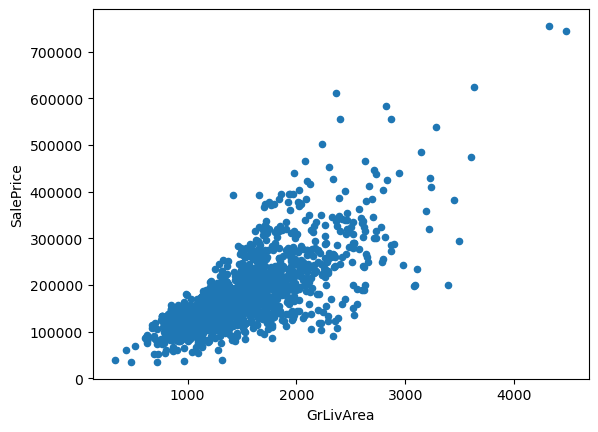

In [17]:
df.plot.scatter(x ='GrLivArea', y='SalePrice')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

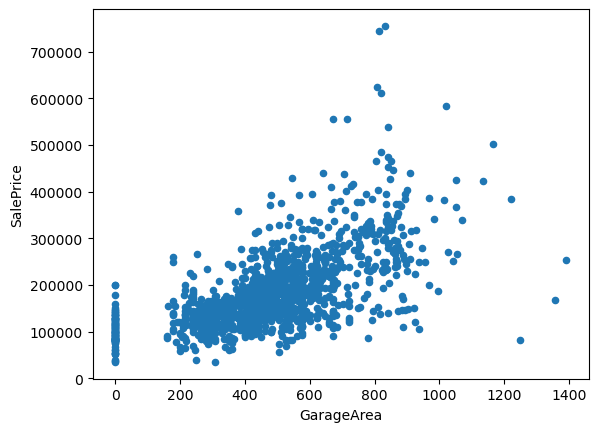

In [18]:
df.plot.scatter(x='GarageArea', y='SalePrice')

In [19]:
df.loc[(df['GarageArea']>1200) & (df['SalePrice']<300000)]

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice
581,582,12704,8,2008,2042,2042,2,3,Ex,8,1390,253293
1061,1062,18000,3,1935,894,894,1,2,TA,6,1248,81000
1190,1191,32463,4,1961,1249,1622,1,3,TA,7,1356,168000


In [20]:
df = df.drop([581, 1061, 1190])

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

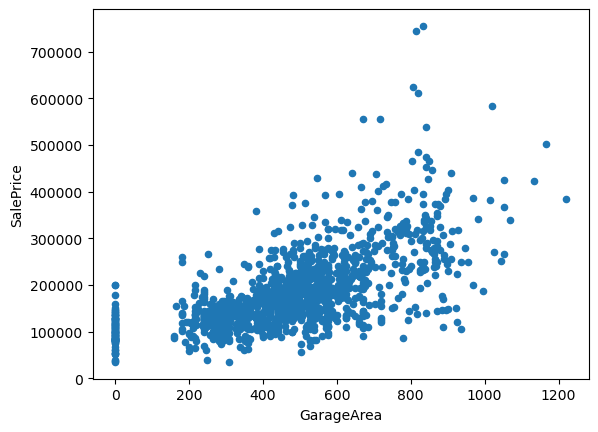

In [21]:
df.plot.scatter(x='GarageArea', y='SalePrice')

<Axes: xlabel='SalePrice', ylabel='Count'>

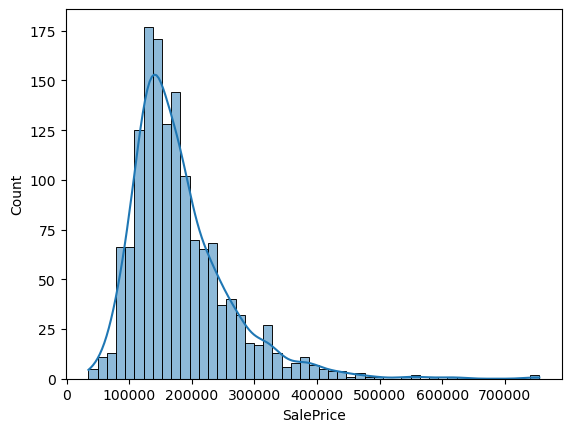

In [22]:
sns.histplot(df['SalePrice'],kde = True)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74176.3532456065, 180889.89202200828, 0.9315857338304127))

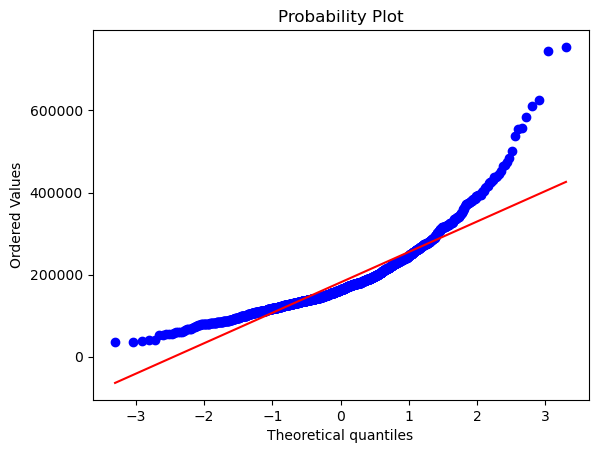

In [23]:
stats.probplot(df['SalePrice'], plot=plt)

In [24]:
df['SalePrice'] = np.log(df["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Count'>

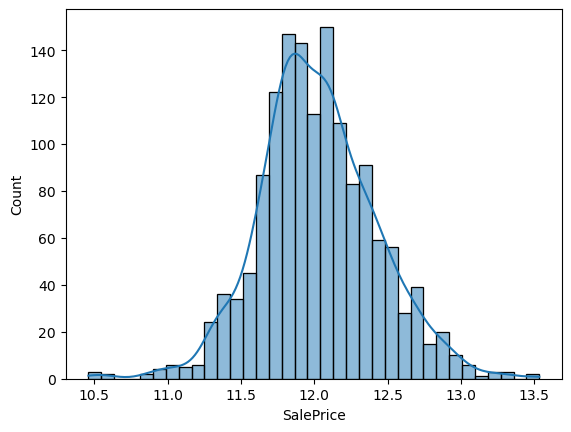

In [25]:
sns.histplot(df['SalePrice'],kde = True)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3981951526590825, 12.023845716834316, 0.9952772349085532))

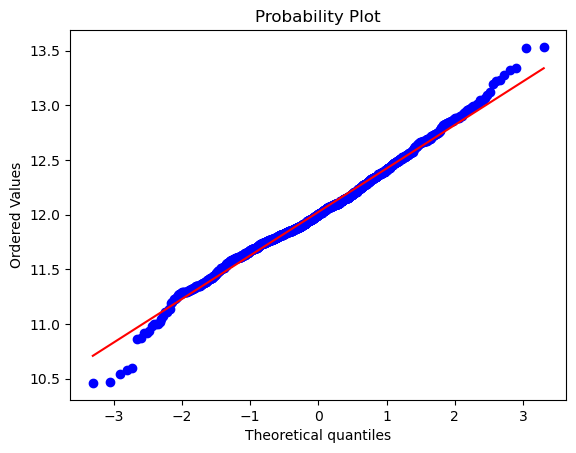

In [26]:
stats.probplot(df['SalePrice'],plot=plt)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.8744641091574, 1510.365887207703, 0.974301721838545))

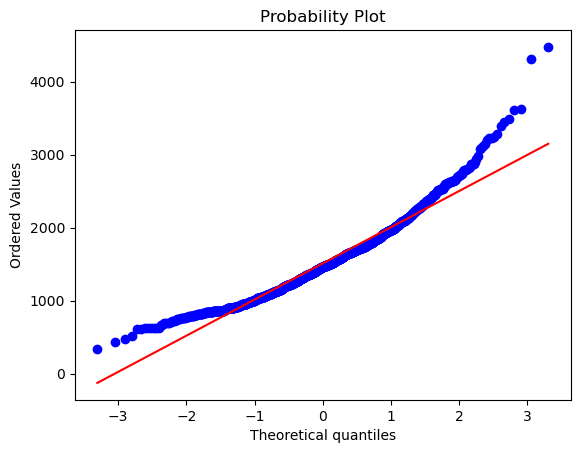

In [27]:
stats.probplot(df['GrLivArea'],plot=plt)

In [28]:
df['GrLivArea'] = np.log(df['GrLivArea'])

<Axes: xlabel='GrLivArea', ylabel='Count'>

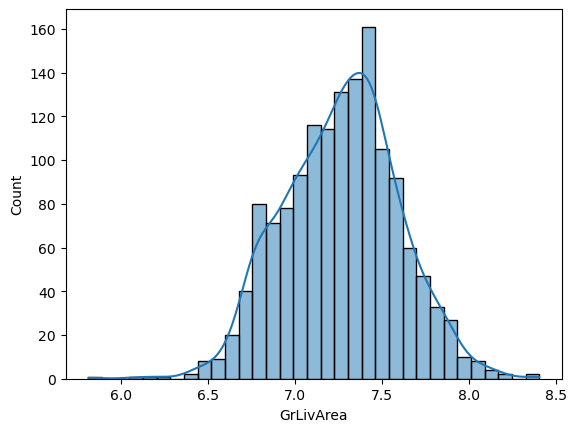

In [29]:
sns.histplot(df['GrLivArea'],kde = True)

((array([-3.30398548, -3.04669486, -2.90360817, ...,  2.90360817,
          3.04669486,  3.30398548]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.19616114, 8.37008433,
         8.40648507])),
 (0.33039107569642506, 7.265927014995005, 0.9981704176655277))

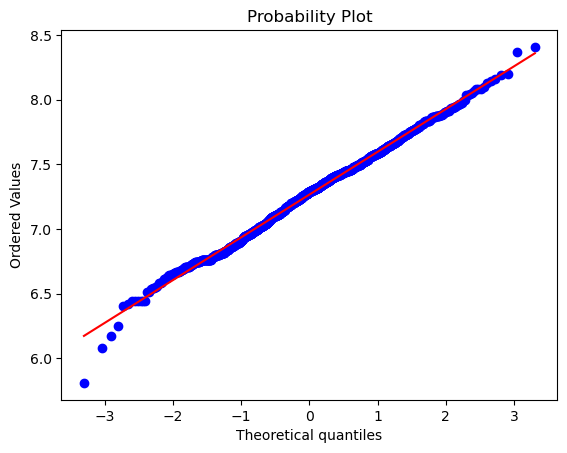

In [30]:
stats.probplot(df['GrLivArea'],plot=plt)

In [33]:
# Categorical variables
df['KitchenQual'].value_counts()

TA    733
Gd    585
Ex     97
Fa     39
Name: KitchenQual, dtype: int64

In [34]:
# we need to create dummy variables
kitchen = pd.get_dummies(df['KitchenQual'])
kitchen.head()

,Ex,Fa,Gd,TA
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [35]:
df = df.join(kitchen)

In [36]:
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,GarageArea,SalePrice,Ex,Fa,Gd,TA
0,1,8450,7,2003,856,7.444249,2,3,Gd,8,548,12.247694,0,0,1,0
1,2,9600,6,1976,1262,7.140453,2,3,TA,6,460,12.109011,0,0,0,1
2,3,11250,7,2001,920,7.487734,2,3,Gd,6,608,12.317167,0,0,1,0
3,4,9550,7,1915,756,7.448334,1,3,Gd,7,642,11.849398,0,0,1,0
4,5,14260,8,2000,1145,7.695303,2,4,Gd,9,836,12.429216,0,0,1,0


In [37]:
df = df.drop(['KitchenQual'],axis=1)
df.head()

,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice,Ex,Fa,Gd,TA
0,1,8450,7,2003,856,7.444249,2,3,8,548,12.247694,0,0,1,0
1,2,9600,6,1976,1262,7.140453,2,3,6,460,12.109011,0,0,0,1
2,3,11250,7,2001,920,7.487734,2,3,6,608,12.317167,0,0,1,0
3,4,9550,7,1915,756,7.448334,1,3,7,642,11.849398,0,0,1,0
4,5,14260,8,2000,1145,7.695303,2,4,9,836,12.429216,0,0,1,0


,Id,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,SalePrice
0,1,8450,7,2003,856,7.444249,2,3,8,548,12.247694
1,2,9600,6,1976,1262,7.140453,2,3,6,460,12.109011
2,3,11250,7,2001,920,7.487734,2,3,6,608,12.317167
3,4,9550,7,1915,756,7.448334,1,3,7,642,11.849398
4,5,14260,8,2000,1145,7.695303,2,4,9,836,12.429216
